# Milestone 3

## Loading the required dataframes:

#### Created a load_and_process function which is in the python_functions.py file and used it to load in the data:

The load_and_process function loads and processes the raw data set from 'lolchallengertotal.csv' into a dataframe called 'loldata' in Python.

The data is loaded using the load_and_process function from 'scripts/python_functions.py' in order to:
   - Combine mutually exclusive (binary) columns into a single more informative column.
       - For example, the binary columns 'blueWin' and 'redWin' can be condensed into a single more informative categorical column. As only a single team can win, it makes more sense to have a column called 'winner' with the value being 'blue' or 'red'. 
   - Drop the original binary columns which are no longer needed. 
   - Rename columns to be more consistent and clear, and to fix spelling and capitalization mistakes. 
   - Order columns in a more appropriate, intuitive, and useful way.
   - Change the time from seconds to MM:SS and create a column for game length.
       - This is important as game length can vastly impact the outcome of the game and what variables are more important. 
       - For example, for long games (>40 mins) the gold difference becomes obsolete (as both team have enough gold for full items, even if one team has a large gold advantage). 
   - Remove 'remakes' (games where a player failed to connnect, so the game is stopped with no winner or loser after 3 minutes).
   
Loaded another dataframe with unprocessed data as it works better for the profiling report.

In [1]:
from scripts.python_functions import *

pd.options.display.max_columns = None
pd.options.display.max_rows = 20

loldata_unprocessed = pd.read_csv('../data/raw/lolchallengertotal.csv')
loldata = load_and_process('../data/raw/lolchallengertotal.csv')
loldata.head(200)

,gameID,gameTime,gameDuration,gameLength,winner,firstBlood,firstTower,firstDragon,firstBaron,firstInhibitor,blueTowerKills,blueDragonKills,blueBaronKills,blueInhibitorKills,blueWard,blueWardKills,blueKills,blueDeaths,blueAssists,blueTotalLevel,blueAvgLevel,blueChampionDamage,blueObjectiveDamage,blueTotalHealing,blueTotalGold,blueTotalCS,blueJungleCS,blueKillingSpree,redTowerKills,redDragonKills,redBaronKills,redInhibitorKills,redWard,redWardKills,redKills,redDeaths,redAssists,redTotalLevel,redAvgLevel,redChampionDamage,redObjectiveDamage,redTotalHealing,redTotalGold,redTotalCS,redJungleCS,redKillingSpree
0,4247263043,22:03,1323,medium,red,blue,red,red,none,red,0,0,0,0,38,13,15,31,22,56,11.2,56039,5675,31035,37001,440,105,4,9,3,0,1,50,17,31,15,68,64,12.8,73016,60463,38711,49832,533,138,8
1,4247155821,21:57,1317,medium,blue,red,red,blue,none,none,4,2,0,0,57,18,19,8,31,63,12.6,60243,45303,26397,41072,531,111,3,2,0,0,0,46,18,8,19,8,59,11.8,44218,14105,24829,37136,571,134,3
2,4243963257,15:32,932,short,red,red,red,red,none,red,0,0,0,0,28,7,5,20,8,42,8.4,24014,5651,6567,22929,306,64,0,5,2,0,1,40,9,20,5,20,50,10.0,30797,45201,12589,35364,400,89,5
3,4241678498,34:58,2098,medium,red,red,red,blue,blue,none,2,1,1,0,129,39,26,36,45,80,16.0,101607,31019,24718,63447,774,226,3,6,3,1,0,96,56,36,26,72,84,16.8,125866,88202,65312,70528,832,205,9
4,4241538868,39:04,2344,medium,blue,blue,blue,blue,blue,blue,11,2,2,3,114,35,27,40,47,83,16.6,134826,95287,37161,74955,831,252,5,6,3,1,1,100,43,40,27,83,85,17.0,131536,64141,86431,74596,794,227,7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
197,4255761502,16:02,962,short,red,blue,red,red,none,none,0,0,0,0,33,11,13,27,17,46,9.2,35698,4252,8264,27382,306,78,1,3,1,0,0,46,11,27,13,23,52,10.4,42472,21139,9881,36072,432,80,6
198,4255663162,27:12,1632,medium,red,red,red,blue,red,red,3,1,0,0,60,28,16,25,33,64,12.8,67495,26149,21165,45386,631,144,5,9,2,1,2,77,20,25,16,58,71,14.2,86546,65508,34539,54256,624,123,6
199,4255601634,24:07,1447,medium,blue,red,blue,blue,blue,blue,9,2,1,2,74,23,37,17,61,69,13.8,79831,53206,44931,54369,520,144,8,0,2,0,0,53,16,17,37,24,58,11.6,65595,23801,12868,40991,505,129,2
200,4255379515,29:10,1750,medium,blue,blue,blue,blue,none,blue,9,4,0,1,90,43,39,13,73,73,14.6,99457,73235,68713,61918,666,197,8,2,0,0,0,100,33,13,39,28,66,13.2,80460,17099,21625,46806,667,118,2


## Introduction to the dataset and analysis:

League of Legends is a free multiplayer online battle arena video game played by millions of people worldwide. As a player myself I hope tshat the analysis of high-elo game data from Korea, data from the best players in the world, can help me understand what in-game factors are the most important, in order to help me improve my own gameplay. I am interested in this data analysis as I have been playing League of Legends for over six years. Over that time, I have improved and ranked up significantly, but have now hit the high-elo barrier. I wish to figure out which objectives are the most important and what early-game events lead to winning in high-elo.

The data used in this project is the in-game data from challenger level League of Legends games in Korea. The data was retrieved from Minyong Shin under CC0 and was released April 2020 and includes data for games played during the Spring Spit – Season 10 (January 2020 to April 2020). The data was collected by [Minyong Shin](https://www.kaggle.com/gyejr95) in order to analyze factors that contribute to winning or losing a game, and to use the conclusions from that analysis to predict game wins and losses. The data was collected using a script that collected data via the Riot Developer Portal. Riot is the developer of League of Legends. The exact way the data was sourced can be found [here](https://shinminyong.tistory.com/30). The data includes important in-game factors for both teams at 10 minutes, 15 minutes, and at the end of the game. More information on each of these factors can be found [here](https://na.leagueoflegends.com/en/featured/new-player-guide#/?_k=cigp47).

#### Some introductory information for League of Legends can be found [here](https://na.leagueoflegends.com/en/featured/new-player-guide#/?_k=cigp47). 

#### Research Questions:

I would like to answer the following research questions:

  1. Which objectives are the most important/highest priority?
  
  2. What early-game events lead to wins in high elo? 
  
Making decisions about objectives and what to focus on in early game is often the determining factor of who wins the game. Thus, answering these questions would give an insight on how to increase the chances of winning. Presumably, the better decisions a team makes, the higher the probability is that they win. My goal is to find out what the best decisions are. 


## Explanation of the dataset variables:

#### The resulting dataframe has 46 columns which are explained below:

  - gameID = the unique game indentifier
    - example: the game in row index 0 was the 4,247,263,043rd game of League of Legends played
    
  - gameTime = the length of the game in MM:SS
  - gameDuration = the length of the game in seconds
  - gameLength = the qualitative length of the game (short, medium, long)
    - this is important as at each stage of the game is a different in-game phase
    - short games likely ended before laning-phase ended and no big objectives have been spawned yet (e.g. Baron or Elder)
    - medium games ended post laning-phase with teams fighting for big objectives, but gold differences are still a factor
    - long games have gone long enough that both teams are full build and gold difference has become obsolete
  - winner = the side which won the game
  - firstBlood/-Tower/-Dragon/-Baron/-Inhibitor = the team which secured/destroyed/killed the first named objective
      - first blood (first kill in the game) = grants bonus gold
      - first tower = grants bonus gold
      - first dragon = grants a small permanent buff to the whole team
        - buff = upgrade/advantage/power-increase
      - first baron = grants a large temporary buff to the whole team which empowers friendly minions near you
        - empowered minions = stronger than normal minions and can be used to destroy enemy structures
      - first inhibitor = spawns super minions for the team which destroyed the inhibitor in that lane
        - super minions = stronger minions which can overpower the enemies normal minions
  - blue-/redTowerKills = how many towers each team destroyed (max. 11)
  - blue-/redDragonKills = how many dragons each team killed 
      - the first team to reach four dragons gets the dragon soul which grants an incredibly strong permanent buff to the whole team and causes the next dragon to spawn to be the Elder Dragon
        - elder dragon = grants an incredibly strong temporary buff to the whole team
  - blue-/redBaronKills = how many barons each team killed
  - blue-/redInhibitorKills = how many inhibitors each team killed
  - blue-/redWard = how many wards were placed by each team
    - ward = a utility tool that can be placed anywhere on the map and allows you and your team to see the surrounding area, instead of fog of war, for a certain amount of time
  - blue-/redWardKills = how many wards were killed by each team
  - blue-/redKills = the total number of kills for each team
  - blue-/redDeaths = the total number of deaths for each team
  - blue-/redAssists = the total number of assists for each team
  - blue-/redTotalLevel = the total number of levels for each team (max. 90)
  - blue-/redAvgLevel = the average number of levels for each team (total number of levels divided by five) (max. 18)
  - blue-/redChampionDamage = the total amount of damage dealt to enemy champions for each team
  - blue-/redObjectiveDamage = the total amount of damage dealt to objectives (e.g. baron, dragons, towers, etc.) for each team
  - blue-/redTotalHealing = the total amount of healing for each team
  - blue-/redTotalGold = the total amount of gold earned for each team
  - blue-/redTotalCS = the total amount of enemy minions killed for each team
  - blue-/redJungleCS = the total amount of jungle monsters killed for each team
  - blue-/redKillingSpree = the largest killing spree for each team 
    - killing spree = the number of kills a player gets before dying once


## Exploratory Data Analysis:

In [2]:
sns.set_theme(style = 'ticks', font_scale = 1.3)

#### Found the total number of Korean Challenger games played in Spring Split (Season 10):

In [3]:
print("Total Number of KR Challenger Games: {}".format(len(loldata)))

Total Number of KR Challenger Games: 26737


This just gives us an overview of how large our dataset is. 

#### Found the total number of wins for each side depending on the length of the game:

In [4]:
loldata_grouped = loldata.groupby(['gameLength', 'winner'])['gameID'].count()
loldata_grouped

gameLength  winner
long        blue       198
            red        173
medium      blue      9480
            red       9507
short       blue      3776
            red       3603
Name: gameID, dtype: int64

The League community often thinks that Blue side wins more often. That is why doing this data analysis was the first one conducted. However, as we can observe, it seems game length does not significantly affect which side wins. This was graphed just in case anything could be determined which could not be from the numbers.


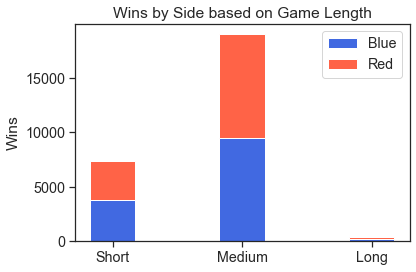

In [5]:
#Wins on each side depending on the game length (stacked bargraph).
N = 3
blueWins = (loldata_grouped['short']['blue'], loldata_grouped['medium']['blue'], loldata_grouped['long']['blue'])
redWins = (loldata_grouped['short']['red'], loldata_grouped['medium']['red'], loldata_grouped['long']['red'])
ind = np.arange(N)    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, blueWins, width, color = 'royalblue')
p2 = plt.bar(ind, redWins, width, bottom = blueWins, color = 'tomato')

plt.ylabel('Wins')
plt.title('Wins by Side based on Game Length')
plt.xticks(ind, ('Short', 'Medium', 'Long'))
plt.legend((p1[0], p2[0]), ('Blue', 'Red'))

plt.show()

The graph agrees that there is no side which wins more often and no side which wins more often depending on the game length. However, the graph makes clear that there is a significant difference between the number of short, medium, and long games. There are many more medium games than short games, and very very few long games. To gain more insight, we can determine the average game length. 

#### Found the average game length:

In [6]:
print("Average Game Duration: {:.0f}:{:.0f} minutes".format(
    (loldata['gameDuration'].mean()/60 - loldata['gameDuration'].mean()/60%1),
    (loldata['gameDuration'].mean()/60%1 * 60)))

Average Game Duration: 24:16 minutes


This agrees with our previous graph that most games are medium, followed by short. The average game time falls within the medium range leaning towards the short boundary. This makes sense as the average estimated time for a game of League by the developers is 30 minutes. Korea as a region is also known to forfeit games when they believe their team cannot comeback and win the game. Rather than playing for another 10 minutes just to lose the game, teams will often forfeit in order to be able to load into a completely new game which they have a better chance of winning. Forfeiting is first allowed after 15 minutes of gameplay. However, as we have seen community beliefs/reputations do not always hold true, so we must test this.

#### Found the distribution of game lengths (to test the forfeit suspicion): 


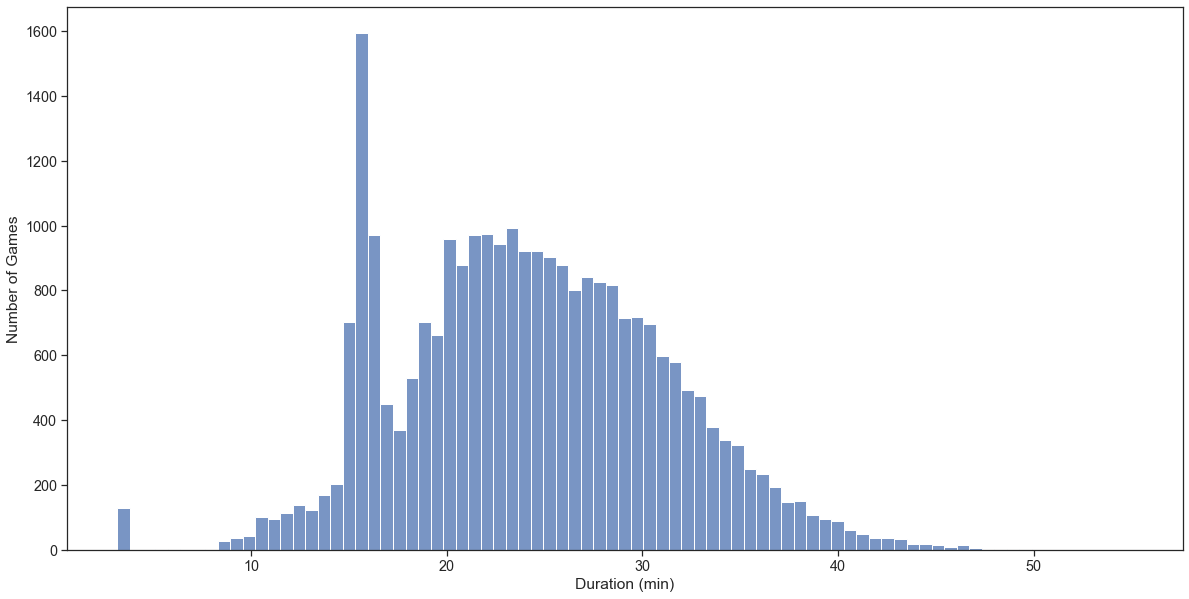

In [7]:
plt.figure(figsize=(20,10))
sns.histplot(loldata['gameDuration']/60)
sns.set(font_scale = 2)
plt.xlabel('Duration (min)')
plt.ylabel('Number of Games')

plt.show()

As we can see the plot follows a normal distribution, with one exception. At 15 minutes there is a huge spike in games; this is due to 15 minutes being when surrender (forfeit) votes are unlocked. When a team believes it cannot win the game, they will surrender at 15 minutes rather than play the game out. This saves time when trying to climb ranks and helps players from tilting. It makes more sense to forfeit a likely lost game and spend those extra 10-15 minutes on a new game. This result is consistent with the qualitative observations from Korean Challenger League of Legends. Players on the Korean server are known to forfeit more games in comparison to regions like North America or Europe. 

#### Found how many games are won by the same team which took the first of a certain objective (tower, dragon, baron, etc.):

This analysis is especially important as we want to answer the research questions and want to determine what early game events lead to victories and which objectives a team should prioritize. If we can see a clear correlation between a team securing a particular objective and that same team winning, we can determine that objective to possibly be game deciding (or at least the majority of cases). 

In [8]:
grouped_firstBlood = loldata.groupby(['winner', 'firstBlood'])['gameID'].count()
print(grouped_firstBlood)

firstBlood_win = grouped_firstBlood['blue']['blue'] + grouped_firstBlood['red']['red']
firstBlood_loss = grouped_firstBlood['blue']['red'] + grouped_firstBlood['red']['blue']

firstBlood_wp = firstBlood_win/(firstBlood_win + firstBlood_loss)*100
print("")
print("The percentage of games won after getting first blood is {:.2f}%.".format(firstBlood_wp))

winner  firstBlood
blue    blue          8163
        none            33
        red           5258
red     blue          5313
        red           7970
Name: gameID, dtype: int64

The percentage of games won after getting first blood is 60.41%.


In [9]:
grouped_firstTower = loldata.groupby(['winner', 'firstTower'])['gameID'].count()
print(grouped_firstTower)

firstTower_win = grouped_firstTower['blue']['blue'] + grouped_firstTower['red']['red']
firstTower_loss = grouped_firstTower['blue']['red'] + grouped_firstTower['red']['blue']

firstTower_wp = firstTower_win/(firstTower_win + firstTower_loss)*100

print("")
print("The percentage of games won after getting first tower is {:.2f}%.".format(firstTower_wp))

winner  firstTower
blue    blue          10088
        none            137
        red            3229
red     blue           4053
        none             10
        red            9220
Name: gameID, dtype: int64

The percentage of games won after getting first tower is 72.61%.


In [10]:
grouped_firstDragon = loldata.groupby(['winner', 'firstDragon'])['gameID'].count()
print(grouped_firstDragon)

firstDragon_win = grouped_firstDragon['blue']['blue'] + grouped_firstDragon['red']['red']
firstDragon_loss = grouped_firstDragon['blue']['red'] + grouped_firstDragon['red']['blue']

firstDragon_wp = firstDragon_win/(firstDragon_win + firstDragon_loss)*100

print("")
print("The percentage of games won after getting first dragon is {:.2f}%.".format(firstDragon_wp))

winner  firstDragon
blue    blue           7236
        none           1246
        red            4972
red     blue           3696
        none           1012
        red            8575
Name: gameID, dtype: int64

The percentage of games won after getting first dragon is 64.59%.


In [11]:
grouped_firstBaron = loldata.groupby(['winner', 'firstBaron'])['gameID'].count()
print(grouped_firstBaron)

firstBaron_win = grouped_firstBaron['blue']['blue'] + grouped_firstBaron['red']['red']
firstBaron_loss = grouped_firstBaron['blue']['red'] + grouped_firstBaron['red']['blue']

firstBaron_wp = firstBaron_win/(firstBaron_win + firstBaron_loss)*100

print("")
print("The percentage of games won after getting first baron is {:.2f}%.".format(firstBaron_wp))

winner  firstBaron
blue    blue          5403
        none          6808
        red           1243
red     blue          1164
        none          6189
        red           5930
Name: gameID, dtype: int64

The percentage of games won after getting first baron is 82.48%.


In [12]:
grouped_firstInhibitor = loldata.groupby(['winner', 'firstInhibitor'])['gameID'].count()
print(grouped_firstInhibitor)

firstInhibitor_win = grouped_firstInhibitor['blue']['blue'] + grouped_firstInhibitor['red']['red']
firstInhibitor_loss = grouped_firstInhibitor['blue']['red'] + grouped_firstInhibitor['red']['blue']

firstInhibitor_wp = firstInhibitor_win/(firstInhibitor_win + firstInhibitor_loss)*100

print("")
print("The percentage of games won after getting first inhibitor is {:.2f}%.".format(firstInhibitor_wp))

winner  firstInhibitor
blue    blue              9073
        none              3684
        red                697
red     blue               804
        none              3799
        red               8680
Name: gameID, dtype: int64

The percentage of games won after getting first inhibitor is 92.20%.


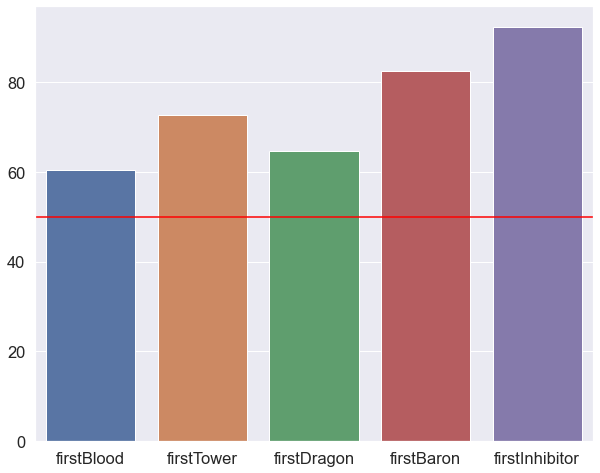

In [13]:
category = ['firstBlood', 'firstTower', 'firstDragon', 'firstBaron', 'firstInhibitor']
winPercentage = [firstBlood_wp, firstTower_wp, firstDragon_wp, firstBaron_wp, firstInhibitor_wp]

plt.figure(figsize=(10,8))
sns.set(font_scale = 1.5)
ax = sns.barplot(x = category, y = winPercentage)
ax.axhline(50, color = 'red')
plt.show()

The objectives (first blood, first tower, first dragon, first baron, first inhibitor) are crucial in determining who wins the game, as they are oftenn linked with rewards or buffs that give the team which takes the objective an advantage. As discussed previously first blood and first tower grant an extra amount of gold, which can be used to buy more items. With more items the team which secured the objective now has a power advantage. The team with the power advantage can then use this to gain more kills and objectives (and thus gain more gold and a bigger advantage, and so on.) This is called snowballing. Thus, getting an early objective is extremely important and is often the deciding factor in a game of which team wins. 

This is the reason this analysis focuses on first objectives. First objectives are usually taken when teams are still evenly matched (no team has a significant advantage). First objectives usually also give an extra advantage. For example, there is no bonus gold for the second kill or second destroyed tower in the game. Second dragons, for example, are also much easier to obtain once you have secured the first dragon (snowballing). As we also saw before, most games are short or medium (with the average game length being around 24 minutes). Hypothetically it would be worth it to increase our medium game win percentage by 10% and decrease our long game win percentage by 100%; we would win more game overall. In other words, we care more about winning short and medium games as the vast majority of the games we play are short or medium in length. Thus, to increase our win percentage we should focus firstly on our early game decisions (such as first blood, first tower, first dragon, etc.)

Making early game decisions is crucial and often one of the most difficult strategical decisions that a team can make. Often making the wrong decision can lose the game. Teams also often trade objectives. For example, if the whole enemy team is doing dragon (located on the bottom side of the map), it may be smart for your own team to take first tower on the top side of the map or vice-versa. Our analysis could help us gain an insight on which objectives are worth trading for in order to have the highest chance of winning. 

From our visual representation we can see that from highest to lowest chance of winnings the objectives are:
  1. first Inhibitor
  2. first Baron
  3. first Tower
  4. first Dragon
  5. first Blood

First inhibitor and first baron having the highest win percentage makes sense. They are lategame objectives, usually take after multiple kills, dragons, and towers. Barons and inhibitors are usually only taken after 20 minutes, by which a team has a significant advantage due to other factors. This is a causation vs. correlation problem. Taking baron or an inhibitor helps a team win, but the team was able to take that objective in the first place because they were already winning. 

However, we can still gain some insight from this result. Baron and inhibitors are usually taken around the same time. We must consider three scenarios. 

  1. We take first baron followed by first inhibitor (because we have baron). 
  2. We take first inhibitor followed by first baron (because we have inhibitor). 
  3. We only have time to take on of the objectives (either first baron or first inhibitor). 
  
The first two scenarios are not really that interesting. In these scenarios our team has a large enough advantage to take both objectives. We do not have to make a choice between either objective, so there is not difficult decision to make. This makes scenario 3 much more interesting. Which objective should we choose to take. Our analysis suggests that we should choose to take first inhibitor instead of first baron. A possibly explanation of this result is the following. 

When taking baron a temporary buff is applied to each teammate. However, this buff is lost when the player is killed. Thus, even if a team secures baron, if the enemy team is able to kill enough members, then the baron buff is essentially useless. However, there is no way of preamturely getting rid of super minions cause by a destroyed inhibitor. This suggest that first inhibitor is a safer objective to take than first baron when your team only has a small advantage. 

First tower, first dragon, and first blood are much more interesting objecties as they are early game objectives (usually taken within the first 10 minutes of the game). For a long time, I had beleived that first dragon should be much higher priority than first tower. Top laners (my main role) can often choose to teleport to dragon to help the team secure the obejctive or they can choose to stay in lane and push for first tower while the enemy team takes dragon. The data analysis suggests that first tower leadsd to significantly more games won than first dragon. 

We can apply some qualititave and intuitive reasoning. When taking first dragon, the whole team receives a small buff. The advantage gained from frist dragon is significant, but not big enough where it cannot be made up through farming minions or getting a regular kill. In contrast, first tower gives an advantage to only one or two players. Even though in total the power advantage gained from first dragon or first tower is comparable, in the latter case the advantage is concentrated on fewer players. For example if the top laner gets solo first turret gold, they could gain anywhere between 450-800 gold. This is such a significant advantage that the top laner can now snowball agains the enemy top laner. This advantage on a single player is often enough decide a game. 

First blood is not that interesting as a variable. We should still try to get first blood, but it is often dependent on outplay potential (i.e. the individual skill of players). First blood is hard to trade objectives on. The standard approach is already to push out lane and take towers if the enemy team is collapsing (grouping up) to secure a first blood. This follows what we have discovered in our data analysis. 


In [14]:
# loldata_unprocessed.profile_report()

# Commented out as the profile report takes up all of my system memory and causes jupyter notebook to crash. 

#### Found the correlation between all variables and winning:

This analysis can help us determine which variables are most correlated with winning (positively or negatively). In other words, what variables, possibly, have a significant effect on the outcome of the game.

In [15]:
pd.set_option('display.max_rows', 50)
loldata_unprocessed.corr()['blueWins']

gameId                    -0.005385
gameDuraton               -0.001414
blueWins                   1.000000
blueFirstBlood             0.206442
blueFirstTower             0.449065
blueFirstBaron             0.366722
blueFirstDragon            0.267778
blueFirstInhibitor         0.637521
blueDragonKills            0.466442
blueBaronKills             0.355048
blueTowerKills             0.708405
blueInhibitorKills         0.554367
blueWardPlaced             0.037542
blueWardkills              0.070485
blueKills                  0.453521
blueDeath                 -0.439782
blueAssist                 0.372974
blueChampionDamageDealt    0.180180
blueTotalGold              0.276481
blueTotalMinionKills       0.078853
blueTotalLevel             0.226127
blueAvgLevel               0.226127
blueJungleMinionKills      0.207726
blueKillingSpree           0.420451
blueTotalHeal              0.215695
blueObjectDamageDealt      0.525094
redWins                   -1.000000
redFirstBlood             -0

The variables with the highest correlation (|corr| > 0.5) with winning are: 
  - blueWin
    - blueFirstTower             0.45
    - blueFirstInhibitor         0.64
    - blueDragonKills            0.47
    - blueTowerKills             0.71
    - blueInhibitorKills         0.55
    - blueKills (redDeaths)      0.45
    - blueObjectDamageDealt      0.53
    - redFirstTower             -0.45
    - redFirstInhibitor         -0.62
    - redDragonKills            -0.47
    - redTowerKills             -0.71
    - redInhibitorKills         -0.55
    - redObjectDamageDealt      -0.55
    
These all make sense and follow our above analysis for first tower and first inhibitor. In regards to dragon kills, tower kills, and inhibitor kills we can apply the same points about causation and correlation, as well as snowballing. Thus, they are not as interesting to us as it does not really help us make a tough choice in-game. We know that dragon/tower/inhibitor kills help us win the game, this correlation helps support that, but not much more. More analysis would have to be done taking into account the complex mechanisms between variables to gain a more in-depth insight (most variables are not independent). For example, two dragon kills will make it easier to pick up an extra tower or vice-versa. 


#### Plotted interesting variables colored by who won the game:

We can now plot some of the more specific variables in the game such as total CS (creep score = how many minions have been killed) in both the jungle and in total, total gold, objective damage (the team's total damage to objectives), champion damage (the team's total damage to enemy champions), kills, deaths, assists, wards, and ward kills. 

Plots take blue sides value of the variable as its x-axis position and red sides value of the variable as its y-axis position. The color of each observation is the color of the team that won that particular match. All variables should be positively correlated (e.g. if a team has more gold it should be the winning team). This is what we are testing with the following data analysis: 


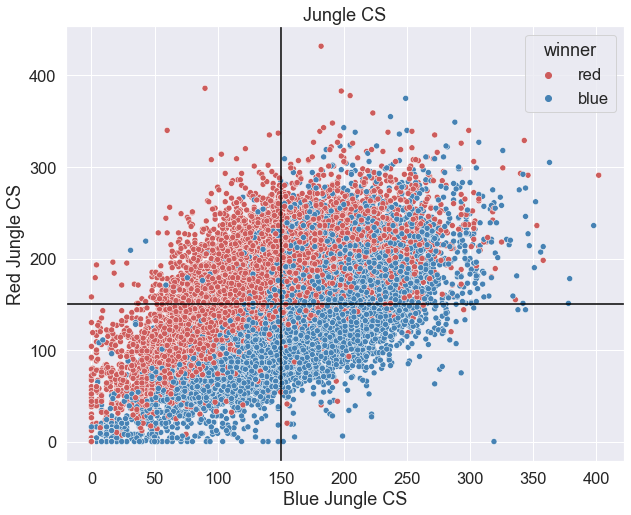

In [71]:
plt.figure(figsize=(10,8))

sns.set(font_scale = 1.5)

ax = sns.scatterplot(
    data=loldata, 
    x="blueJungleCS", 
    y="redJungleCS", 
    hue="winner", 
    palette=["indianred", "steelblue"],
    legend="full")
ax.set_title("Jungle CS")
ax.set_xlabel("Blue Jungle CS")
ax.set_ylabel("Red Jungle CS")
ax.axhline(150, color = 'black')
ax.axvline(150, color = 'black')
plt.show()

We can see that prior to teams reach approximately 150 total jungle CS, the team who has the jungle CS advantage usually wins the game. The game has increasingly shifted to a jungle focused meta (meta = current paradigm or typical strategical thinking). This is clearly shown in the graphical analysis. Teams that have a jungle CS lead early in the game typically win. However, we can see that post 150 total jungle CS the colors start mixing, in other words it is not clear who wins the game based on the difference in Jungle CS. We may infer from this that teams should focus in the early- and mid- game on helping their jungler farm, but this become less of a priority in lategame. 

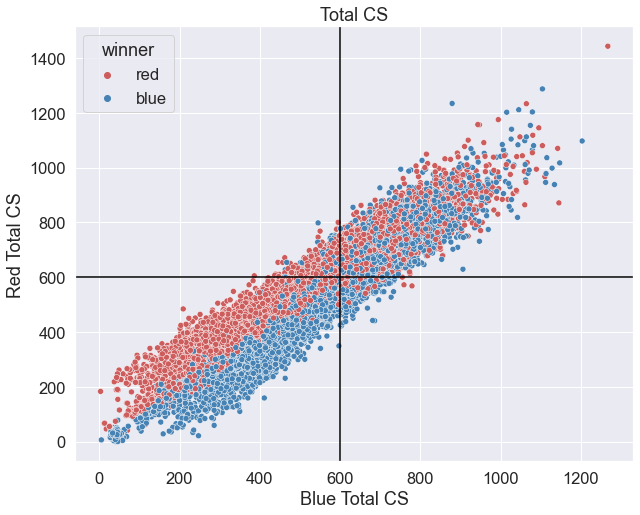

In [72]:
plt.figure(figsize=(10,8))

sns.set(font_scale = 1.5)

ax = sns.scatterplot(
    data=loldata, 
    x="blueTotalCS", 
    y="redTotalCS", 
    hue="winner", 
    palette=["indianred", "steelblue"],
    legend="full")
ax.set_title("Total CS")
ax.set_xlabel("Blue Total CS")
ax.set_ylabel("Red Total CS")
ax.axhline(600, color = 'black')
ax.axvline(600, color = 'black')
plt.show()

Looking at total CS we see a very similar trend. The majority of games with less than 600 CS for either team can be predicted by who has the CS lead. If red has a CS advantage, red most likely wins the game. Similarly, if blue has a CS advantage, blue most likely wins the game. This makes sense as CSing the primary source of gold in League of Legends. Thus, who has the CS advantage, typically has the gold advantage, has a power advantage, and thus is stronger and more likely to win. Interestingly, we see the similar trend of mixing post 600 total CS. 

As supports players (one of the main five roles) do not CS, we can split the CS over the other 4 players. The mixing occurs after each player has on average 150 CS. Korean challenger players are known to have around 10 CS/min, thus we can estimate that this is around the 15 minute mark. It is interesting to see that the games that are won early are extremely correlated with CS advantage. However, the games that go beyond 15 minutes do not seem to be correlated with CS advantage. We could make a possible argument that post 15 minutes objectives such as dragons, barons, towers are worth more and more determining of the winner than CS advantage. 

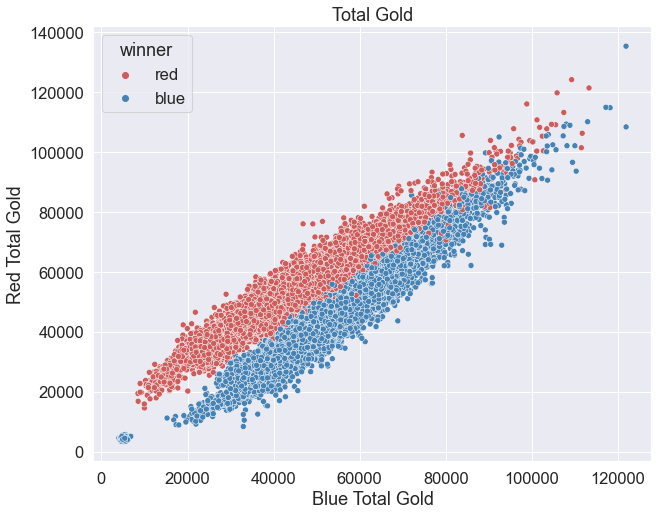

In [73]:
plt.figure(figsize=(10,8))

sns.set(font_scale = 1.5)

ax = sns.scatterplot(
    data=loldata, 
    x="blueTotalGold", 
    y="redTotalGold", 
    hue="winner", 
    palette=["indianred", "steelblue"],
    legend="full")
ax.set_title("Total Gold")
ax.set_xlabel("Blue Total Gold")
ax.set_ylabel("Red Total Gold")
plt.show()

This plot is extremely interesting. As previously mentioned gold is the most important asset in the game. Gold means more items, means more power, means higher chances of winning fights and taking objectives, means winning the game. Even though in the past few graphs we have seen mixing on the high end of the spectrum, on the total gold graph we do not see mixing anywhere. Total gold seems to almost perfectly predict the winner of the game at all stages. This seems to reaffirm that a teams decision should always be to take the objective that yields the most gold (which may be different depending on the current in-game context).


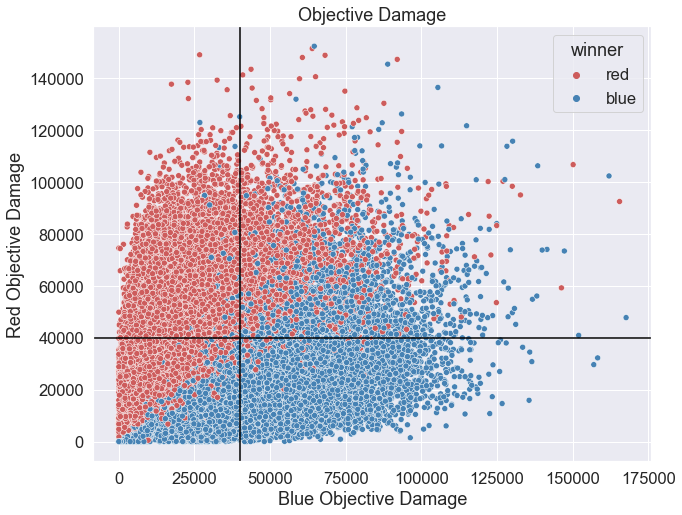

In [74]:
plt.figure(figsize=(10,8))

sns.set(font_scale = 1.5)

ax = sns.scatterplot(
    data=loldata, 
    x="blueObjectiveDamage", 
    y="redObjectiveDamage", 
    hue="winner", 
    palette=["indianred", "steelblue"],
    legend="full")
ax.set_title("Objective Damage")
ax.set_xlabel("Blue Objective Damage")
ax.set_ylabel("Red Objective Damage")
ax.axhline(40000, color = 'black')
ax.axvline(40000, color = 'black')
plt.show()

For objective damage we see a similar trend to jungle and total CS. However, in this case the groupings are much wider (almost heart shaped). What we can take away from this is that if a teams damage to objectives is much larger than the enemies damage to objectives the team is likely to win. This makes sense as higher damage to objectives signifies that a team has probably also taken those objectives, which give the team advantages. Thus we are once again faced with a causation vs. correlation problem. This analysis also is not particularly useful in-game. In contrast to CS and gold which one can see in-game and check-up on, objective damage is a hidden stat that is not visible until after the game. However, we can say that taking objectives is important. 


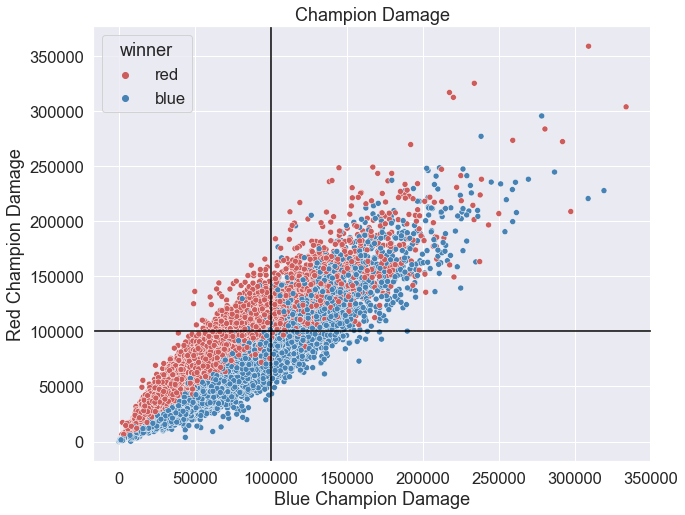

In [75]:
plt.figure(figsize=(10,8))

sns.set(font_scale = 1.5)

ax = sns.scatterplot(
    data=loldata, 
    x="blueChampionDamage", 
    y="redChampionDamage", 
    hue="winner", 
    palette=["indianred", "steelblue"],
    legend="full")
ax.set_title("Champion Damage")
ax.set_xlabel("Blue Champion Damage")
ax.set_ylabel("Red Champion Damage")
ax.axhline(100000, color = 'black')
ax.axvline(100000, color = 'black')
plt.show()

The graph for champion damage is similar again to CS and objective damage. Up until 100,000 damage the team with a damage advantage is most likely to win. However, post 100,000 damage the likely winner becomes much less clear. A possible explanation for this is that lower damage levels imply that the game ended earlier (short game length). Usually, a damage difference in early game can be game deciding as it implies more kills and thus gold. In late game a damage difference, thus loses its significance as more gold at some point when player have purchased their maximum number of items becomes obsolete. In late game it is also often enough to kill one team member in order to gain a significant advantage. Thus, the amount of actual damage done becomes less significant in lategame. Again, this graph does not help us a lot in-game as it is a hidden stat that we can only check after the game. 


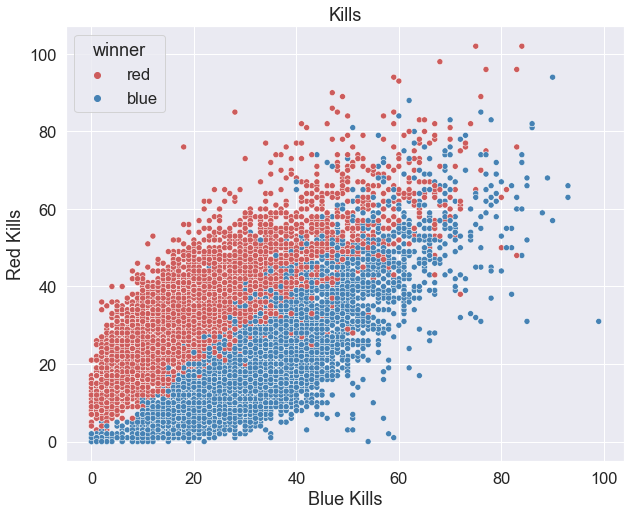

In [76]:
plt.figure(figsize=(10,8))

sns.set(font_scale = 1.5)

ax = sns.scatterplot(
    data=loldata, 
    x="blueKills", 
    y="redKills", 
    hue="winner", 
    palette=["indianred", "steelblue"],
    legend="full")
ax.set_title("Kills")
ax.set_xlabel("Blue Kills")
ax.set_ylabel("Red Kills")
plt.show()

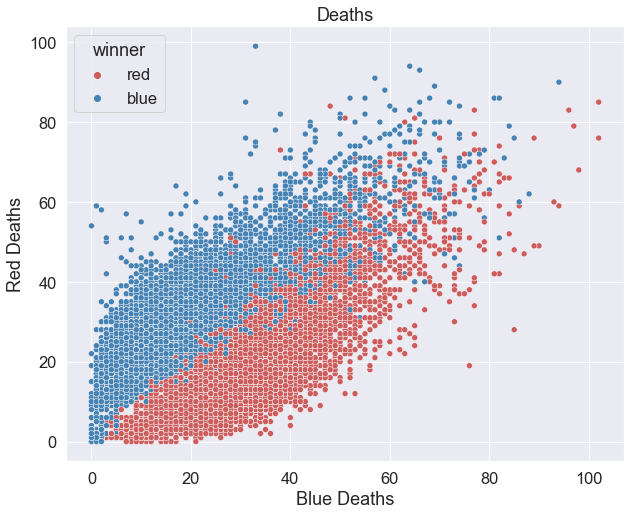

In [77]:
plt.figure(figsize=(10,8))

sns.set(font_scale = 1.5)

ax = sns.scatterplot(
    data=loldata, 
    x="blueDeaths", 
    y="redDeaths", 
    hue="winner", 
    palette=["indianred", "steelblue"],
    legend="full")
ax.set_title("Deaths")
ax.set_xlabel("Blue Deaths")
ax.set_ylabel("Red Deaths")
plt.show()

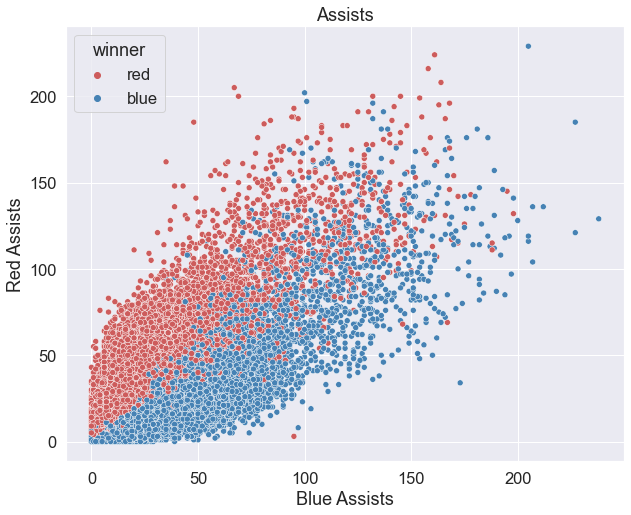

In [78]:
plt.figure(figsize=(10,8))

sns.set(font_scale = 1.5)

ax = sns.scatterplot(
    data=loldata, 
    x="blueAssists", 
    y="redAssists", 
    hue="winner", 
    palette=["indianred", "steelblue"],
    legend="full")
ax.set_title("Assists")
ax.set_xlabel("Blue Assists")
ax.set_ylabel("Red Assists")
plt.show()

Kills, deaths, and assists will all be discussed together. They all show clear correlations (negative in case of deaths) that the team with more kills and assists, and less deaths, is likely to win the game. Again we see some scattering and mixing in the higher portion of the graphs. These graphs clearly show that getting kills and assists and avoiding dying is important to winning the game. However, that is all the advice that we can get from the graph. It does not help us make any significant in-game choices as any time we can get a kill, we will try to get a kill. Similarly, any time we can avoid death, we will try to avoid death. The information from the data analysis does not change the way we play League already. 


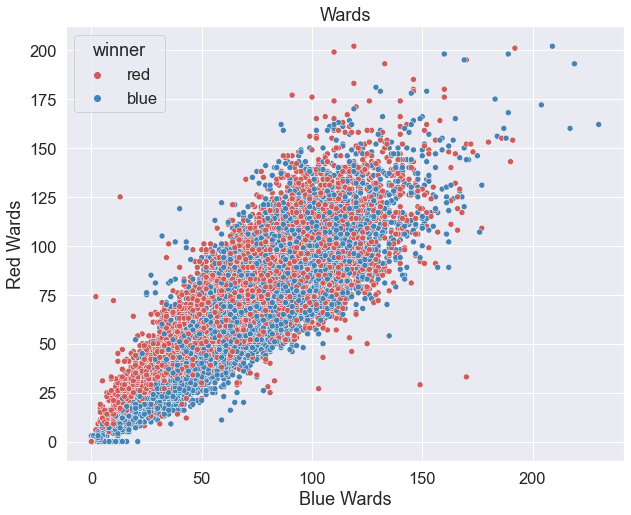

In [79]:
plt.figure(figsize=(10,8))

sns.set(font_scale = 1.5)

ax = sns.scatterplot(
    data=loldata, 
    x="blueWard", 
    y="redWard", 
    hue="winner", 
    palette=["indianred", "steelblue"],
    legend="full")
ax.set_title("Wards")
ax.set_xlabel("Blue Wards")
ax.set_ylabel("Red Wards")
plt.show()

This graph is highly interesting. It shows how many wards each side has placed on the map. Wards can be placed anywhere on the map and reveals the area to your teammates for a specific amount of time. Wards are often deemed highly important, as tracking the positions of enemies can give your team a crucial advantage. However, the graph we see is mixed for the majority of the graph. We can determine that the number of wards is not a good predictor of who will win the match, this contradicts what we would expect. A possible explanation for this is that high level players do not need wards to know where enemies are. They are skilled enough at the game to know or predict where the enemy is. Overall, more analysis is needed to confirm this suspicion. The same data analysis would have to be conducted at lower elos (lower skill levels) and compared. If our explanation is correct we should expect less mixing at lower elos (as lower skilled players would not be able to predict the positions of enemies as well as more skilled players). 


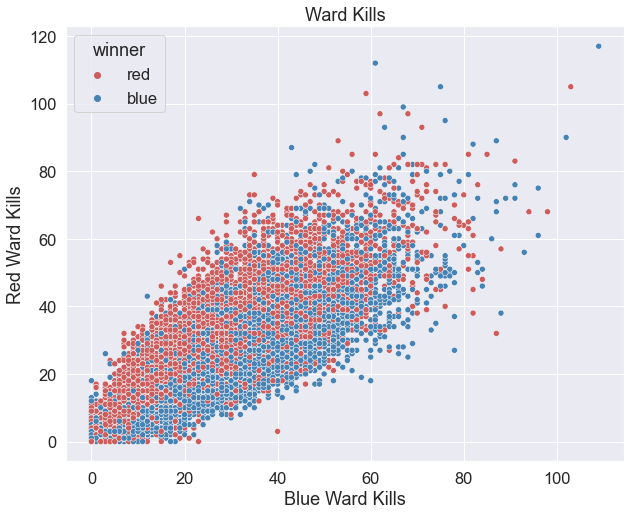

In [80]:
plt.figure(figsize=(10,8))

sns.set(font_scale = 1.5)

ax = sns.scatterplot(
    data=loldata, 
    x="blueWardKills", 
    y="redWardKills", 
    hue="winner", 
    palette=["indianred", "steelblue"],
    legend="full")
ax.set_title("Ward Kills")
ax.set_xlabel("Blue Ward Kills")
ax.set_ylabel("Red Ward Kills")
plt.show()

Wards killed are less mixed than wards placed. This is quite interesting as it suggests that denying vision is more important than gaining vision. We must again consider causation vs. correlation though. Often stronger teams will be able to clear more wards as they have control over a larger area of the map. Thus, it may be possible that a team wins not because they have cleared more wards, but that the team can clear more wards because the team is at an advantage and likely to win. 

## Dataset Summary of Findings:



Our exploratory data analysis has yielded mostly expected results, but some surprising results as well. We can now more clearly answer the initially posed research questions at the beginning of this data analysis. Our results have also led to some interesting questions which may be answered by further secondary and comparative data analysis. 

##### Research Question 1: Which objectives are the most important/highest priority?
    
A lot more analysis is needed to fully understand every aspect of the game and what objectives should be prioritized. The fundamental problem is that variables are not independent and that causation vs. correlation is unclear in a lot of cases.

A possible research question that could be asked is "What objectives lead to a larger snowballing effect?" For example, we could investigate how often a team that takes first dragon captures the elder dragon (a much more powerful dragon that spawns once either team has slain four dragons). 

Furthermore, we also confirmed a lot of other paradigms in the League community. For example, gold is the most important factor to winning and the best predictor for which team will win the game. Variables which lead to more gold are thus correlated to winning (jungle CS, total CS, objective damage, champion damage, kills, deaths, assists). This was an expected result. We did find out that for some of these results when the game gets to its later stages predicting a winner based on single variables which affect gold becomes much harder and "mixing" occurs. The sole predictor that is correlated with winning fo the whole length of the graph is gold itself. A possible explanation for this is that a team might have a jungle CS advantage and champion damage advantage, but may not be leading in gold (maybe behind in total CS and objective damage). Thus, at the later-stages of the game we get mixing. To test this we could do a secondary data analysis where we standardise gold-affecting variables and add them together. If our suspicions are correct, then the graph should have a clear split (similar to the gold graph).

We also, surprisingly, found out that vision (wards and ward kills) have less effect on the outcome of the game than I initially believed. As mentioned above this may be that Korean challenger players are good enough to where wards lose some in-game power and players can predict where the enemy is positioned. This could be tested in a secondary data analysis by repeating the above analysis in a lower elo and comparing results. 

##### Research Question 2: What early-game events lead to wins in high elo? 

Early game objectives were made a lot clearer. First tower should be prioritized over first Dragon as more game are won when objectives are traded this way. Reasoning for this could be that the advantage gained is spread less thinly over teammates when choosing to take dragon. Teleporting to dragon also leads to a teleport advantage (when your team still has teleport, but the enemy team does not). This means that a subsequent teleport cannot be matched/followed, which could lead to a secondary indirect advantage from choosing to take turret rather than dragon. 

This analysis was highly interesting as I had previously believed that dragon was always the higher priority as it gives all teammates an advantage, even if that advantage was smaller. But the data analysis has helped convince me that the converse it true. If I am every in a 50/50 situation as a toplaner and can choose between teleporting to dragon or pushing for first turret, I will now likely choose to take turret rather than teleport. 

